# Basics of Anomaly Detection

Import libraries

In [5]:
import numpy as np
import pandas as pd
from pyod.utils.data import generate_data
import matplotlib.pyplot as plt

Generate Some Data

In [36]:
contamination = 0.15  #set percentage of outliers
n_train = 500
n_test=500    #Set the number of training and testing data

n_features = 2   #number of feature in our data, lets keep it simple for now

In [37]:
X_train, y_train, X_test, y_test = generate_data(n_train=n_train, 
                    n_test=n_test, n_features= n_features, contamination=contamination)

C:\Users\aiden\Anaconda3\lib\site-packages\pyod\utils\data.py:190: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.8.0. Please use behaviour="new", which makes the returned datasets in the order of X_train, X_test, y_train, y_test.
  FutureWarning)


Lets plot what we have

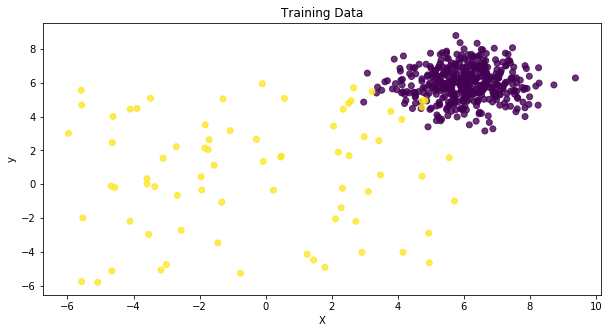

In [46]:
plt.figure(figsize=[10,5])
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=0.8)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Training Data')
plt.show()

We can see that the outliers are highlighted in yellow, whereas the normal data is purple.

Lets first try K-nearest neighbours to detect the anomalies. It's a non-parametric method that will identify the k closest training examples. Any isoalted data points can be potentially classified as an outlier.

Lets now import and train the model.

In [39]:
from pyod.models.knn import KNN

In [40]:
model_name = 'KNN'
model = KNN()  #Initialise model

In [41]:
model.fit(X_train)
y_predictions = model.predict(X_test)

Now that the model is trained, lets see how our predictions fare.

Predicitons for anomalies are just 0 and 1, so we can just count

In [42]:
unique, counts = np.unique(y_predictions, return_counts=True)

In [43]:
print(unique, counts)

[0 1] [450  50]


In [44]:
y_test_scores = model.decision_function(X_test) #Calculate Anomaly Scores

k-NN model uses the Euclidean Distance to measure the distance between points. An outlier is a point thats distant from neighbours, so the outlier score will be defined by the distance value. 

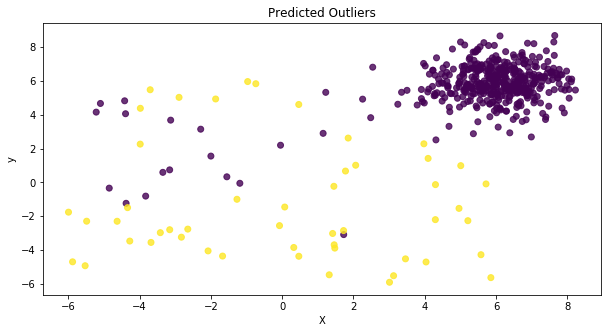

In [47]:
plt.figure(figsize=[10,5])
plt.scatter(X_test[:,0], X_test[:,1], c=y_predictions, alpha=0.8)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Predicted Outliers')
plt.show()

It looks like a lot of the outliers have been classfied as "normal".

Let's explore the Anomaly Scores

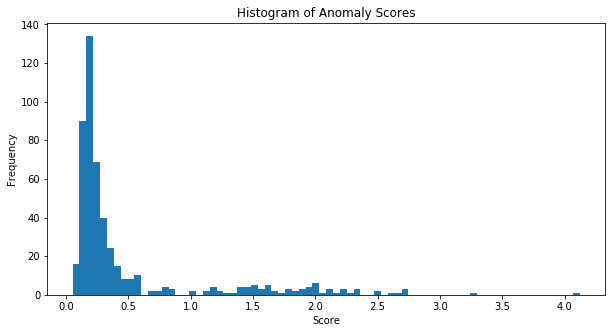

In [49]:
plt.figure(figsize=[10,5])
plt.hist(y_test_scores, bins='auto')
plt.title('Histogram of Anomaly Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

Now let's show the summary statistics of the normal and abnormal clusters.
Because we have generated data, let's jsut label then as "Feature 0" and "Feature 1"

In [63]:
df_test = pd.DataFrame(X_test)
df_test['score'] = y_test_scores
df_test['cluster'] = np.where(df_test['score']<1, 0, 1)
df_test['cluster'].value_counts()
df_test.rename(columns={0:'Feature 0', 1:'Feature 1'}, inplace = True)
# Now let's show the summary statistics:

df_test.groupby('cluster').mean()


,Feature 0,Feature 1,score
cluster,,,
0,6.051697,5.938757,0.246056
1,-0.058793,0.029146,1.838983


It looks like cluster 0 averages around 6 for both features and has an anomaly score close to 0, whereas cluster 1, the outliers, have a much greater anomaly score.

In [ ]:
Looking at our test data graph above, we can see the model has ove